In [357]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np 

In [222]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [224]:
print(len(train_data))
print(len(test_data))

891
418


In [225]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [226]:
# check for missing values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [227]:
train_data[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [228]:
# mode value of Embarked
# train_data['Embarked'].mode()

0    S
dtype: object

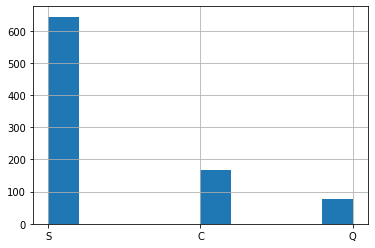

In [229]:
# value distribution for Embarked
# train_data['Embarked'].hist()

In [230]:
# which is most occuring Embarked for Pclass == 1
# train_data[train_data['Pclass'] == 1]['Embarked'].hist()

In [173]:
# train_data['Embarked'].fillna('S', inplace=True)

In [231]:
# non-embarked passengers ignored
train_data = train_data[~train_data['Embarked'].isna()]

In [232]:
train_data[(train_data['Pclass'] == 3) & (train_data['Cabin'].isna().any())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


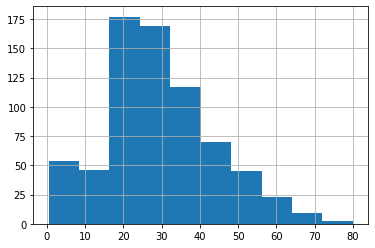

In [233]:
# right-skewed?
train_data['Age'].hist()

In [234]:
train_data['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

0.3888806178753708


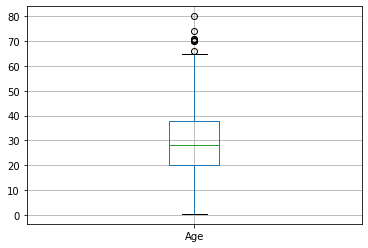

In [235]:
train_data.boxplot(column='Age')
print(train_data['Age'].skew())

In [236]:
# median ( can be seen from the description of the column Age)
print(train_data['Age'].quantile(0.50))

28.0


In [237]:
train_data['Age'].mean()

29.64209269662921

In [ ]:
age_na = 28

In [238]:
train_data['Age'].fillna(age_na, inplace=True)

In [239]:
print(train_data['Age'].isna().sum())
train_data.isna().sum()

0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [240]:
train_data['Age'].skew()

0.41775869717919367

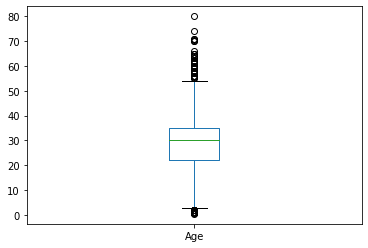

In [241]:
train_data['Age'].plot.box()

In [242]:
train_data[train_data['Age'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [243]:
train_data.drop(630, inplace=True)

In [244]:
train_data[train_data['Age'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [245]:
train_data.reset_index(drop=True, inplace=True)

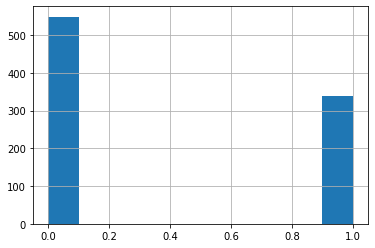

In [246]:
train_data['Survived'].hist()

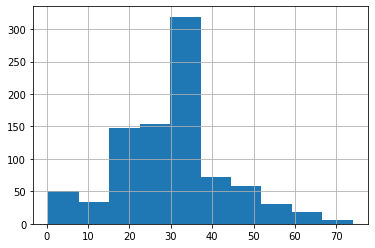

In [247]:
train_data['Age'].hist()

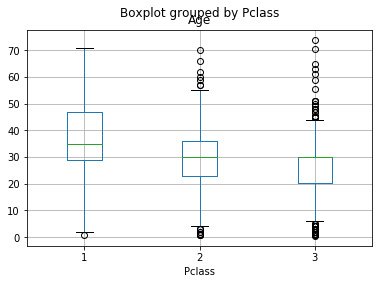

In [248]:
train_data.boxplot(column="Age", by="Pclass")

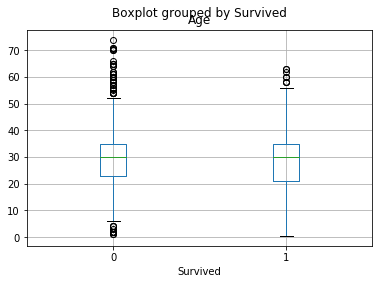

In [249]:
train_data.boxplot(column="Age", by="Survived")

In [250]:
train_data.drop(columns=['Cabin'], inplace=True)

In [251]:
train_data['Sex'].replace("male", "1", inplace=True)
train_data['Sex'].replace("female", "2", inplace=True)

In [252]:
# string to int
train_data['Sex'] = train_data['Sex'].astype(int)

In [253]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


Test Data

In [254]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [255]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.791667,0.381757,2.313063,1.351351,29.656723,0.524775,0.382883,32.099042
std,257.067879,0.486091,0.834007,0.477662,12.866001,1.104186,0.807113,49.725461
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200
75%,668.250000,1.000000,3.000000,2.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,2.000000,74.000000,8.000000,6.000000,512.329200


In [256]:
# check for missing values
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [257]:
test_data.drop(columns=["Cabin"], inplace=True)

In [258]:
test_data['Age'].fillna(age_na, inplace=True)

In [259]:
test_data['Sex'].replace("male", "1", inplace=True)
test_data['Sex'].replace("female", "2", inplace=True)

In [260]:
test_data['Sex'] = test_data['Sex'].astype(int)

In [261]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [262]:
test_data[test_data['Age']>75]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",2,76.0,1,0,19877,78.85,S


In [263]:
X = train_data.drop(columns=['Survived', 'Name', 'PassengerId', 'Ticket', 'Fare', 'Embarked', 'Age'])
X_test = test_data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Fare', 'Embarked', 'Age'])

In [264]:
Y = train_data['Survived']

In [265]:
print(X.shape)
print(Y.shape)
print(X_test.shape)

(888, 4)
(888,)
(418, 4)


In [266]:
X.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch'], dtype='object')

In [267]:
X.head()

,Pclass,Sex,SibSp,Parch
0,3,1,1,0
1,1,2,1,0
2,3,2,0,0
3,1,2,1,0
4,3,1,0,0


In [268]:
# split the dataset into training and validation set.
X_train,X_valdn,Y_train,Y_valdn=train_test_split(X,Y,test_size=0.25,random_state=5)

In [269]:
logreg = LogisticRegression()

In [270]:
logreg.fit(X_train,Y_train)

/home/vishnu/anaconda2/envs/py3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [271]:
Y_valn_pred=logreg.predict(X_valdn)

In [272]:
metrics.confusion_matrix(Y_valdn, Y_valn_pred)

array([[130,   9],
       [ 27,  56]])

In [273]:
print("Accuracy:",metrics.accuracy_score(Y_valdn, Y_valn_pred))
print("Precision:",metrics.precision_score(Y_valdn, Y_valn_pred))
print("Recall:",metrics.recall_score(Y_valdn, Y_valn_pred))

Accuracy: 0.8378378378378378
Precision: 0.8615384615384616
Recall: 0.6746987951807228


RandomForestClassifier

In [132]:
params = {'n_estimators':50, 'max_depth': 8, 'random_state': 5}

In [133]:
randomClassifer = RandomForestClassifier(**params)

In [134]:
randomClassifer.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [135]:
Y_rfc_pred=randomClassifer.predict(X_valdn)

In [136]:
metrics.confusion_matrix(Y_valdn, Y_rfc_pred)

array([[117,  20],
       [ 20,  66]])

In [137]:
print("Accuracy:",metrics.accuracy_score(Y_valdn, Y_rfc_pred))
print("Precision:",metrics.precision_score(Y_valdn, Y_rfc_pred))
print("Recall:",metrics.recall_score(Y_valdn, Y_rfc_pred))

Accuracy: 0.820627802690583
Precision: 0.7674418604651163
Recall: 0.7674418604651163


Predict on Test Set

In [274]:
model = logreg

In [275]:
Y_test_pred = model.predict(X_test)

In [276]:
Y_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [277]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': Y_test_pred})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Neural Network

In [417]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [418]:
# split the dataset into training and validation set.
X_train,X_valdn,Y_train,Y_valdn=train_test_split(X,Y,test_size=0.25,random_state=5)

In [419]:
print(X_train.shape, X_valdn.shape, Y_train.shape, Y_valdn.shape)

(666, 4) (222, 4) (666,) (222,)


In [440]:
# Model 
model = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [441]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_47 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [442]:
model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

In [443]:
# Train and validate the model
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_valdn, Y_valdn)) # , verbose=0

Train on 666 samples, validate on 222 samples
Epoch 1/100
666/666 [==============================] - 2s 3ms/step - loss: 0.6781 - acc: 0.5976 - val_loss: 0.6517 - val_acc: 0.6441
Epoch 2/100
666/666 [==============================] - 0s 93us/step - loss: 0.6435 - acc: 0.6261 - val_loss: 0.6271 - val_acc: 0.6486
Epoch 3/100
666/666 [==============================] - 0s 92us/step - loss: 0.6270 - acc: 0.6321 - val_loss: 0.6111 - val_acc: 0.6486
Epoch 4/100
666/666 [==============================] - 0s 93us/step - loss: 0.6144 - acc: 0.6456 - val_loss: 0.5985 - val_acc: 0.6486
Epoch 5/100
666/666 [==============================] - 0s 105us/step - loss: 0.6041 - acc: 0.6682 - val_loss: 0.5871 - val_acc: 0.6892
Epoch 6/100
666/666 [==============================] - 0s 111us/step - loss: 0.5940 - acc: 0.7117 - val_loss: 0.5764 - val_acc: 0.7432
Epoch 7/100
666/666 [==============================] - 0s 134us/step - loss: 0.5856 - acc: 0.7252 - val_loss: 0.5667 - val_acc: 0.7477
Epoch 8/100
66

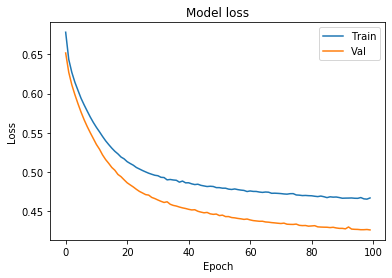

In [444]:
# training and validation loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

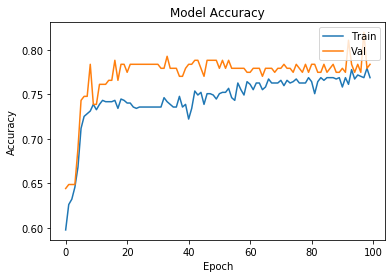

In [445]:
# training and validation loss plot
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [435]:
test_results = model.predict_classes(X_test)

In [436]:
test_results.shape

(418, 1)

In [386]:
test_results = test_results.flatten()

In [387]:
test_results

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [388]:
test_data.shape

(418, 10)

In [389]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': test_results})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [446]:
np.max(hist.history['val_acc'])

0.8198198171349259

In [447]:
val_results = model.predict_classes(X_valdn)

In [448]:
metrics.confusion_matrix(Y_valdn, val_results)

array([[113,  26],
       [ 22,  61]])